In [1]:
MAD_corrected = True

#MAD errors are scaled by 1.4826
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_absolute_deviation.html
#The scaling factor applied to the MAD.
#The default scale (1.4826) ensures consistency with the standard deviation for normally distributed data.

In [2]:
import os
import plot_utils as pu

from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

In [3]:
save = True

In [4]:
# function check
scores_df = pu.get_best_scores_df("distilgpt2")
scores_df

/om2/user/ckauf/anaconda39/envs/perturbed3.8/lib/python3.8/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


score     error       condition          category
0   0.871620  0.077534        original          original
1   0.058070  0.095018  length-control          controls
2   0.658132  0.107074       random-wl          controls
3   0.772000  0.118059           nouns  information-loss
4   0.832689  0.129917      nounsverbs  information-loss
5   0.815670  0.166101   nounsverbsadj  information-loss
6   0.847025  0.121691    contentwords  information-loss
7   0.493653  0.063573   functionwords  information-loss
8   0.708768  0.111683    random-nouns  information-loss
9   0.847901  0.076104    sent_passage  sentence-meaning
10  0.717296  0.088610      sent_topic  sentence-meaning
11  0.662557  0.075870     sent_random  sentence-meaning
12  0.876199  0.043466      scrambled1        word-order
13  0.876261  0.038490      scrambled3        word-order
14  0.860827  0.048159      scrambled5        word-order
15  0.884308  0.093576      scrambled7        word-order
16  0.795170  0.074308        backward        word-order
17  0.884736  0.096202          lowpmi        word-order
18  0.849663  0.091064   lowpmi-random        word-order

In [5]:
if MAD_corrected:
    scores_df["error"] = scores_df["error"].div(1.4826) #MAD is wrong

In [6]:
def barplot(model_identifier, scores_df, emb_context="Passage", split_coord="Sentence", testonperturbed=False):
    
    colors = sns.color_palette("rocket")[1:]
    sns.set(font_scale=1.4)

    #get proportions for subplot width
    categories = ["original", "controls", "information-loss", "sentence-meaning", "word-order"]
    props = [len(scores_df.loc[scores_df["category"] == cat])/len(scores_df) for cat in categories]

    g = sns.FacetGrid(scores_df, col="category", hue="category", palette=colors, sharex=False,
                     gridspec_kws={"width_ratios": props}, height=7, aspect=.45)
    g.map(sns.barplot, "condition", "score", alpha=0.8)
    g.map(plt.errorbar, "condition", "score", "error", ls='none', color="k", capsize=5)
    g.set_titles(col_template="{col_name}")
    g.set_xlabels("")
    g.set_xticklabels(rotation=80)
    
    if not model_identifier == "gpt2-xl":
        g.set(ylim=(0, 1))
    else:
        g.set(ylim=(0, 1.25))
    
    title = f"{model_identifier}"
    
    if not testonperturbed:
        title += f" | Trained and tested on perturbed"
    
    if split_coord == "Passage":
        title += f" | split_coord = Passage"
        
    if emb_context == "Sentence":
        title_addition = " | decontextualized"

    g.fig.suptitle(title)
    g.fig.tight_layout()

    if save:
        g.savefig(f'images/match-to-brain_{title}.png', bbox_inches='tight', dpi=240)

    plt.show()

In [7]:
def main(model_identifier, emb_context="Passage", split_coord="Sentence", testonperturbed=False):
    scores_df = pu.get_best_scores_df(model_identifier, emb_context=emb_context,
                                      split_coord=split_coord, testonperturbed=testonperturbed)
    
    if MAD_corrected:
        scores_df["error"] = scores_df["error"].div(1.4826) #MAD is wrong
        
    print(scores_df)
    
    barplot(model_identifier, scores_df, emb_context=emb_context,
            split_coord=split_coord, testonperturbed=testonperturbed)

       score     error       condition          category
0   1.107199  0.095669        original          original
1   0.104821  0.037072  length-control          controls
2   0.925266  0.107224       random-wl          controls
3   0.990527  0.127608           nouns  information-loss
4   1.049179  0.054855      nounsverbs  information-loss
5   1.074820  0.100552   nounsverbsadj  information-loss
6   1.069320  0.127623    contentwords  information-loss
7   0.532726  0.075075   functionwords  information-loss
8   0.850396  0.065018    random-nouns  information-loss
9   1.013114  0.075353    sent_passage  sentence-meaning
10  0.839734  0.092515      sent_topic  sentence-meaning
11  0.782234  0.068470     sent_random  sentence-meaning
12  1.050021  0.056118      scrambled1        word-order
13  1.045820  0.106527      scrambled3        word-order
14  1.082610  0.020368      scrambled5        word-order
15  1.093634  0.111487      scrambled7        word-order
16  1.041335  0.052001        b

/om2/user/ckauf/anaconda39/envs/perturbed3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


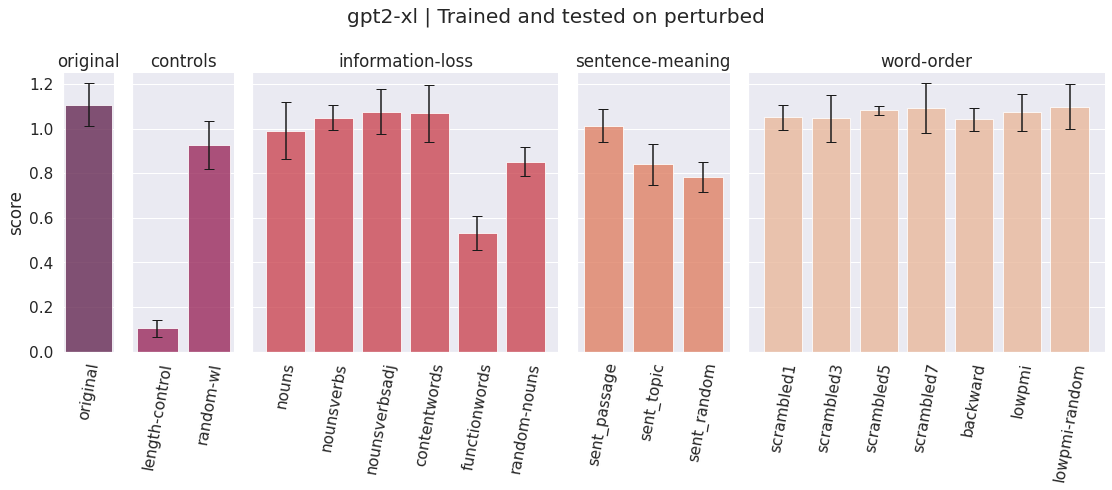

In [8]:
main("gpt2-xl")

       score     error      condition          category
0   1.107199  0.095669       original          original
1   0.108709  0.047466      random-wl          controls
2   0.644818  0.052686          nouns  information-loss
3   0.808808  0.066434     nounsverbs  information-loss
4   0.856148  0.037165  nounsverbsadj  information-loss
5   0.883215  0.074997   contentwords  information-loss
6   0.185882  0.027557  functionwords  information-loss
7   0.122776  0.056776   random-nouns  information-loss
8   0.891967  0.055412   sent_passage  sentence-meaning
9   0.313610  0.088694     sent_topic  sentence-meaning
10  0.068910  0.023085    sent_random  sentence-meaning
11  1.019374  0.081204     scrambled1        word-order
12  0.924364  0.058010     scrambled3        word-order
13  0.907545  0.048376     scrambled5        word-order
14  0.914475  0.067044     scrambled7        word-order
15  0.835083  0.043818       backward        word-order
16  0.933212  0.047396         lowpmi        wor

/om2/user/ckauf/anaconda39/envs/perturbed3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


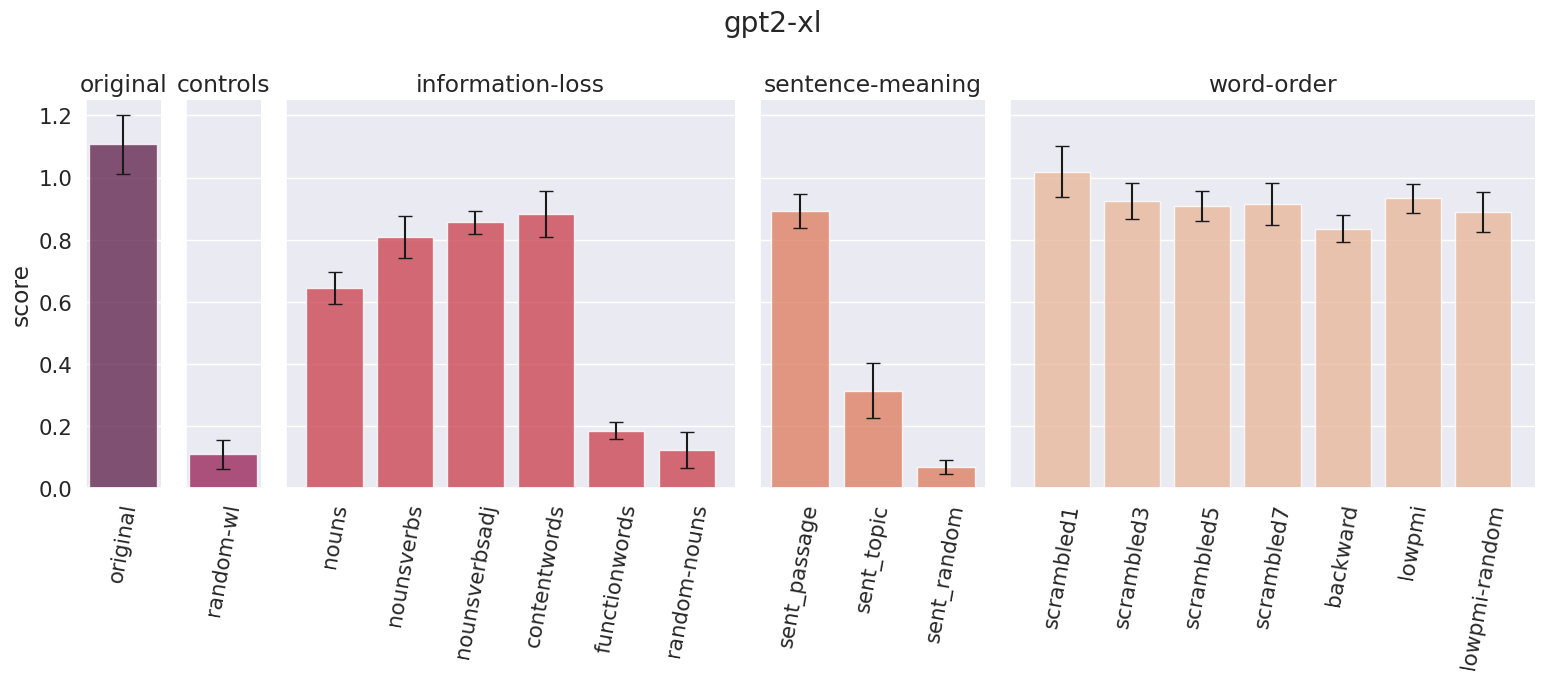

In [9]:
main("gpt2-xl", testonperturbed=True)

       score     error       condition          category
0   0.843386  0.062040        original          original
1   0.057004  0.027939  length-control          controls
2   0.661631  0.060833       random-wl          controls
3   0.714939  0.088313           nouns  information-loss
4   0.818842  0.060391      nounsverbs  information-loss
5   0.832675  0.085126   nounsverbsadj  information-loss
6   0.838693  0.088676    contentwords  information-loss
7   0.443427  0.083466   functionwords  information-loss
8   0.602162  0.054634    random-nouns  information-loss
9   0.817542  0.023296    sent_passage  sentence-meaning
10  0.658357  0.026115      sent_topic  sentence-meaning
11  0.566214  0.123502     sent_random  sentence-meaning
12  0.802361  0.053021      scrambled1        word-order
13  0.860432  0.053304      scrambled3        word-order
14  0.780568  0.060400      scrambled5        word-order
15  0.835097  0.094842      scrambled7        word-order
16  0.825489  0.038054        b

/om2/user/ckauf/anaconda39/envs/perturbed3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


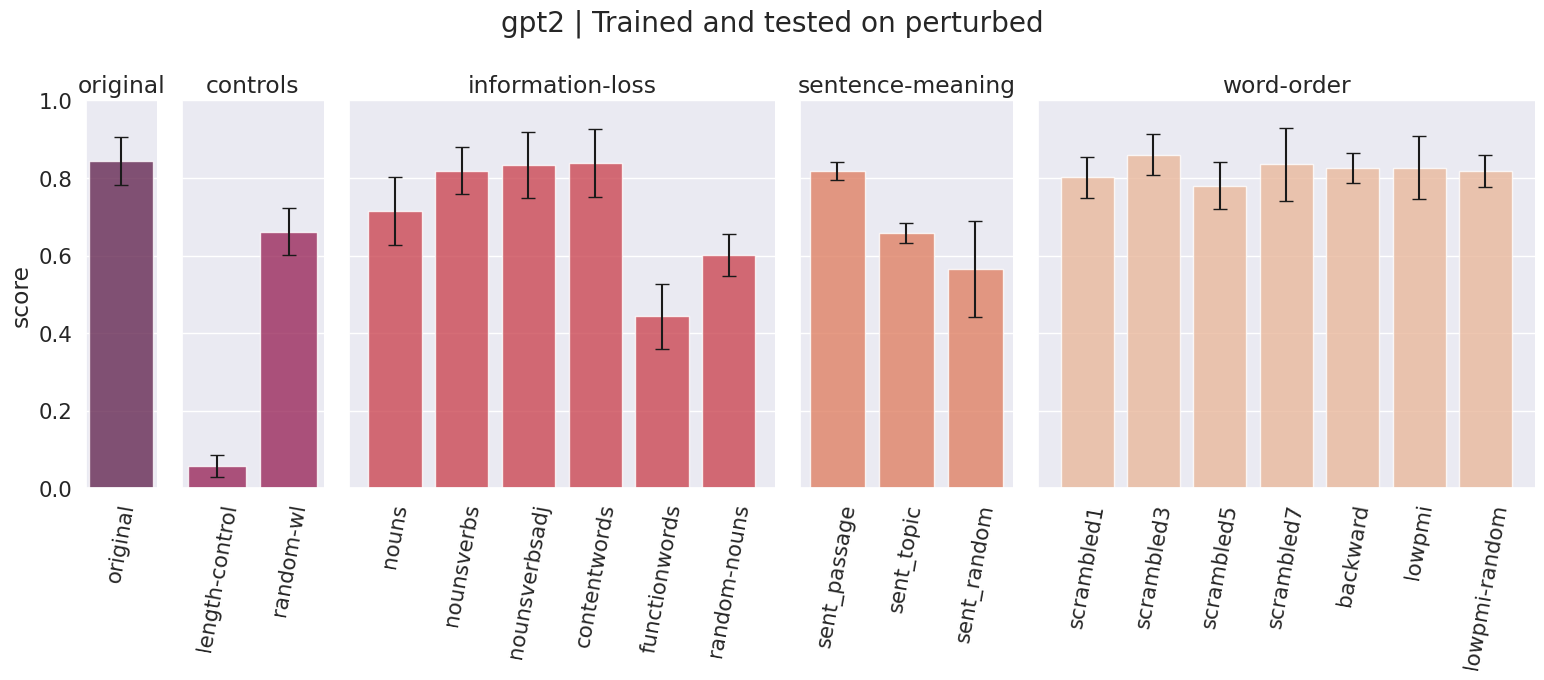

In [10]:
main("gpt2")

       score     error       condition          category
0   0.842554  0.061610        original          original
1   0.100268  0.134992  length-control          controls
2   0.064996  0.050086       random-wl          controls
3   0.397303  0.068567           nouns  information-loss
4   0.535433  0.075522      nounsverbs  information-loss
5   0.586849  0.049595   nounsverbsadj  information-loss
6   0.600945  0.068666    contentwords  information-loss
7   0.136819  0.091872   functionwords  information-loss
8   0.104086  0.046818    random-nouns  information-loss
9   0.714082  0.087189    sent_passage  sentence-meaning
10  0.268446  0.087074      sent_topic  sentence-meaning
11  0.070127  0.068013     sent_random  sentence-meaning
12  0.764876  0.062547      scrambled1        word-order
13  0.611855  0.088903      scrambled3        word-order
14  0.591097  0.089921      scrambled5        word-order
15  0.574295  0.023737      scrambled7        word-order
16  0.495811  0.059518        b

/om2/user/ckauf/anaconda39/envs/perturbed3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


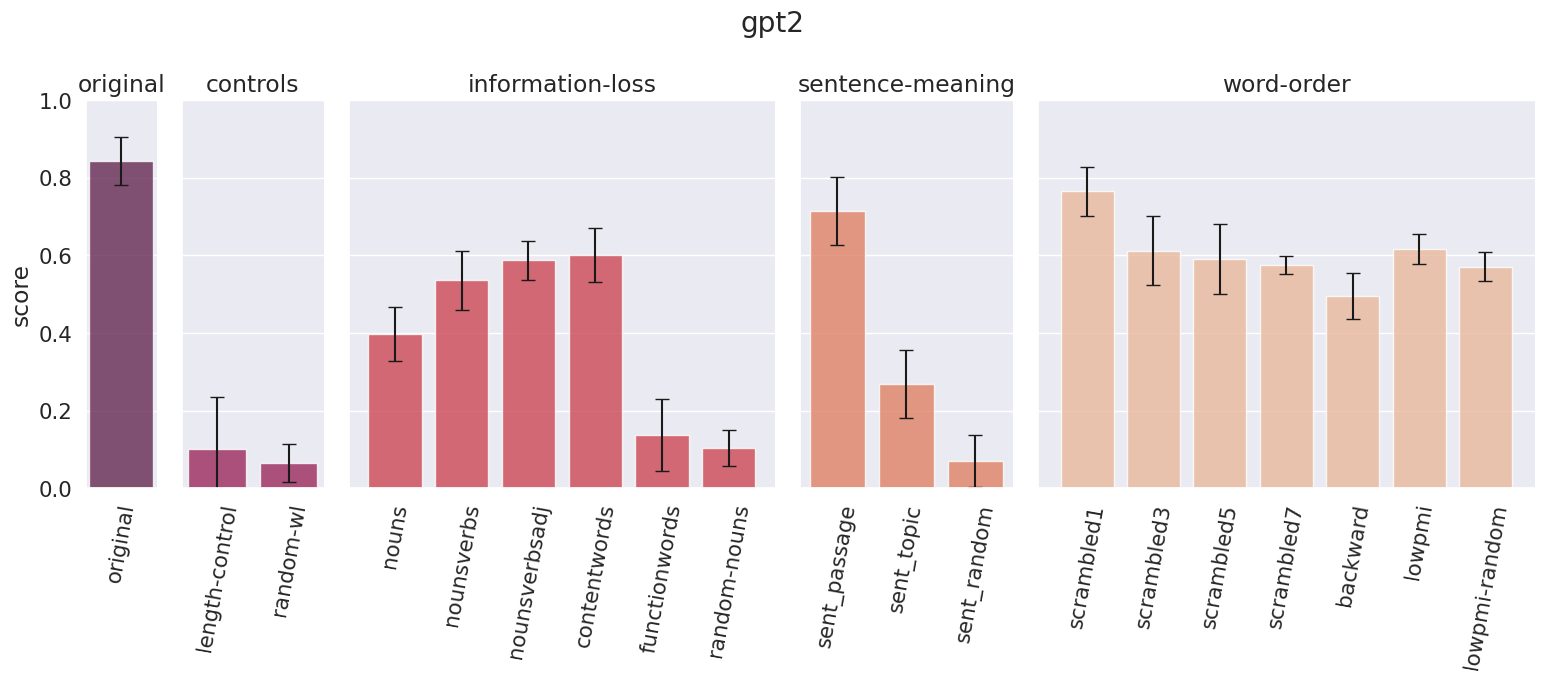

In [11]:
main("gpt2", testonperturbed=True)

       score     error       condition          category
0   0.871697  0.053801        original          original
1   0.092608  0.081183  length-control          controls
2   0.054255  0.050159       random-wl          controls
3   0.411143  0.057818           nouns  information-loss
4   0.535305  0.047681      nounsverbs  information-loss
5   0.589532  0.045657   nounsverbsadj  information-loss
6   0.626116  0.032708    contentwords  information-loss
7   0.068914  0.043795   functionwords  information-loss
8   0.049070  0.055970    random-nouns  information-loss
9   0.668799  0.056763    sent_passage  sentence-meaning
10  0.235218  0.061642      sent_topic  sentence-meaning
11  0.059332  0.030669     sent_random  sentence-meaning
12  0.832241  0.052369      scrambled1        word-order
13  0.593185  0.080867      scrambled3        word-order
14  0.569616  0.067051      scrambled5        word-order
15  0.552148  0.051845      scrambled7        word-order
16  0.483172  0.063796        b

/om2/user/ckauf/anaconda39/envs/perturbed3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


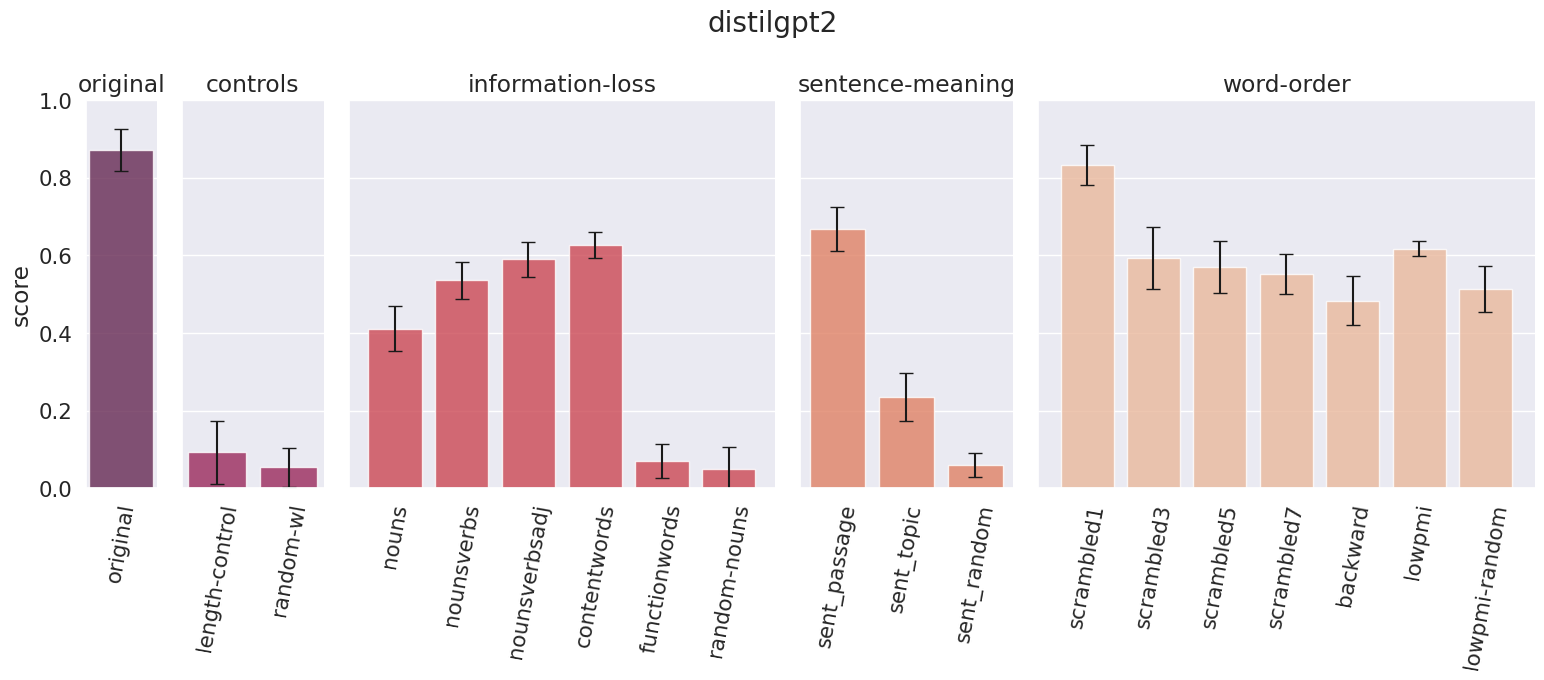

In [12]:
main("distilgpt2", testonperturbed=True)

       score     error      condition          category
0   1.107199  0.095669       original          original
1   0.108709  0.047466      random-wl          controls
2   0.644818  0.052686          nouns  information-loss
3   0.808808  0.066434     nounsverbs  information-loss
4   0.856148  0.037165  nounsverbsadj  information-loss
5   0.883215  0.074997   contentwords  information-loss
6   0.185882  0.027557  functionwords  information-loss
7   0.122776  0.056776   random-nouns  information-loss
8   0.891967  0.055412   sent_passage  sentence-meaning
9   0.313610  0.088694     sent_topic  sentence-meaning
10  0.068910  0.023085    sent_random  sentence-meaning
11  1.019374  0.081204     scrambled1        word-order
12  0.924364  0.058010     scrambled3        word-order
13  0.907545  0.048376     scrambled5        word-order
14  0.914475  0.067044     scrambled7        word-order
15  0.835083  0.043818       backward        word-order
16  0.933212  0.047396         lowpmi        wor

/om2/user/ckauf/anaconda39/envs/perturbed3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


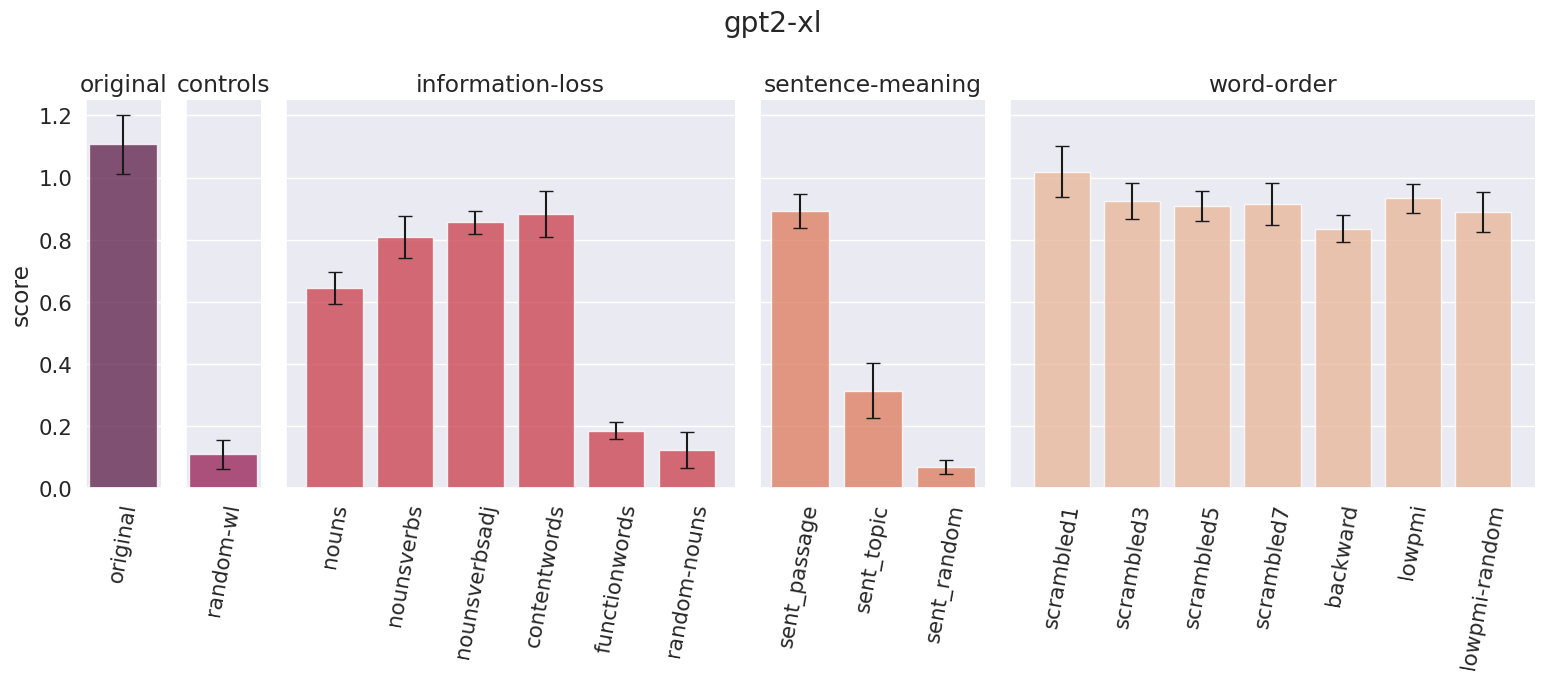

In [13]:
main("gpt2-xl", testonperturbed=True)

       score     error      condition          category
0   0.308036  0.107304       original          original
1   0.167766  0.048169      random-wl          controls
2   0.227373  0.146983          nouns  information-loss
3   0.262437  0.074990     nounsverbs  information-loss
4   0.291943  0.076796  nounsverbsadj  information-loss
5   0.321457  0.154545   contentwords  information-loss
6   0.095401  0.044168  functionwords  information-loss
7   0.107751  0.059878   random-nouns  information-loss
8   0.168466  0.072465   sent_passage  sentence-meaning
9   0.206199  0.107761     sent_topic  sentence-meaning
10  0.123489  0.051645    sent_random  sentence-meaning
11  0.285687  0.122300     scrambled1        word-order
12  0.287302  0.128641     scrambled3        word-order
13  0.290782  0.116747     scrambled5        word-order
14  0.261944  0.134566     scrambled7        word-order
15  0.233677  0.090371       backward        word-order
16  0.296849  0.120734         lowpmi        wor

/om2/user/ckauf/anaconda39/envs/perturbed3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


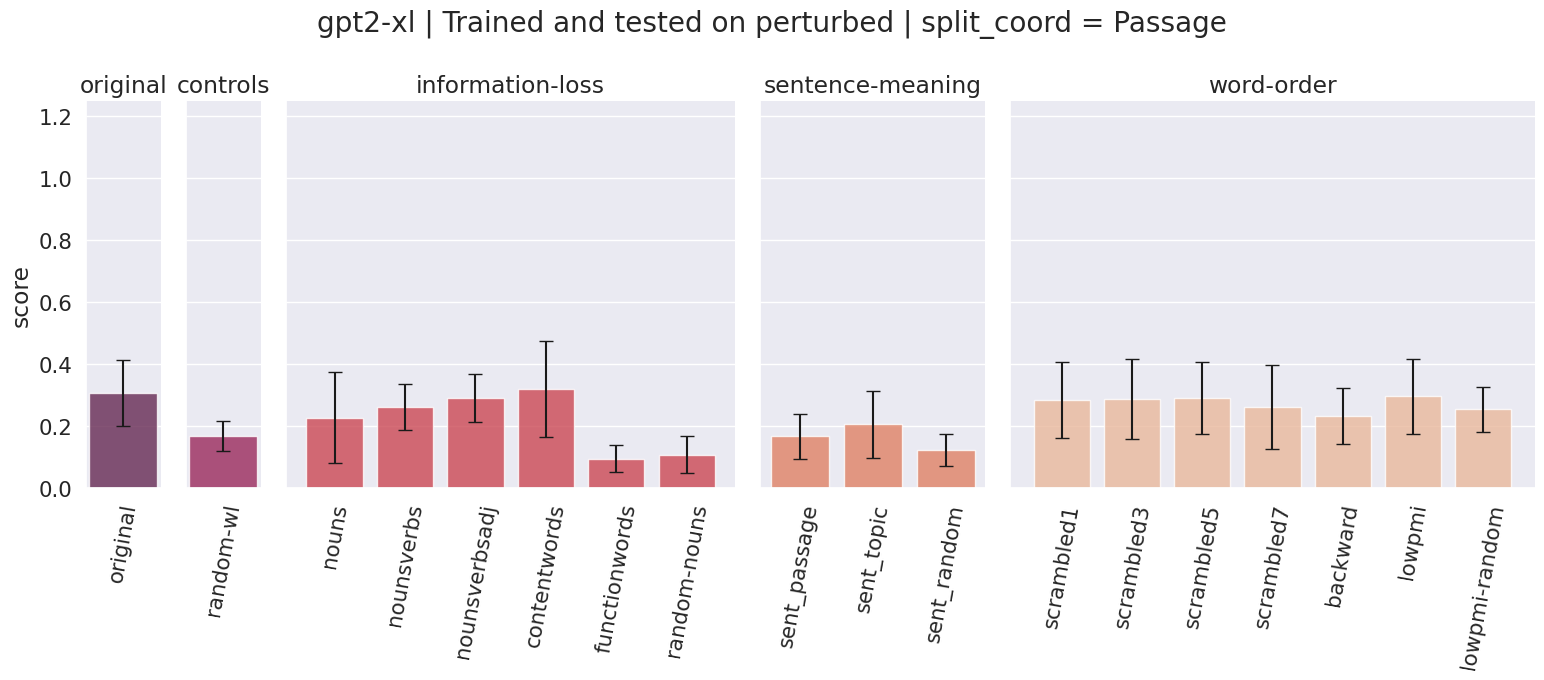

In [14]:
main("gpt2-xl", split_coord="Passage")

       score     error       condition          category
0   0.763902  0.064793        original          original
1   0.008270  0.023640  length-control          controls
2   0.617151  0.054578       random-wl          controls
3   0.759426  0.072225           nouns  information-loss
4   0.784351  0.040448      nounsverbs  information-loss
5   0.790163  0.038462   nounsverbsadj  information-loss
6   0.797044  0.053091    contentwords  information-loss
7   0.284201  0.034154   functionwords  information-loss
8   0.525267  0.073210    random-nouns  information-loss
9   0.693289  0.029731    sent_passage  sentence-meaning
10  0.602638  0.083578      sent_topic  sentence-meaning
11  0.524070  0.112098     sent_random  sentence-meaning
12  0.814990  0.069884      scrambled1        word-order
13  0.802156  0.072123      scrambled3        word-order
14  0.848647  0.068933      scrambled5        word-order
15  0.817240  0.072382      scrambled7        word-order
16  0.865987  0.050345        b

/om2/user/ckauf/anaconda39/envs/perturbed3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


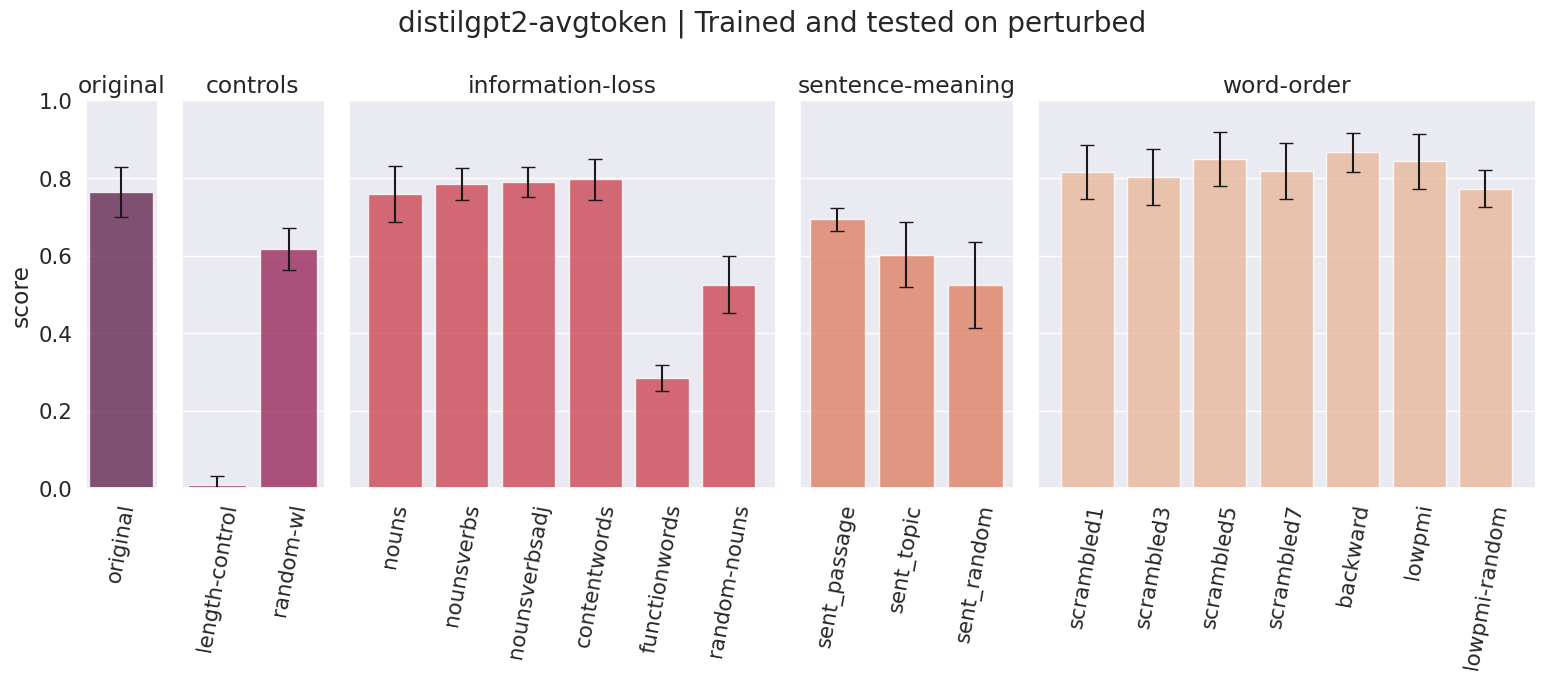

In [15]:
main("distilgpt2-avgtoken")

       score     error      condition          category
0   0.763902  0.064793       original          original
1   0.084728  0.034754      random-wl          controls
2   0.550927  0.077788          nouns  information-loss
3   0.596743  0.061827     nounsverbs  information-loss
4   0.651171  0.087841  nounsverbsadj  information-loss
5   0.680465  0.080442   contentwords  information-loss
6   0.130808  0.047025  functionwords  information-loss
7   0.860347  0.027257   sent_passage  sentence-meaning
8   0.279104  0.071780     sent_topic  sentence-meaning
9   0.039249  0.050535    sent_random  sentence-meaning
10  0.757327  0.065808     scrambled1        word-order
11  0.731660  0.090061     scrambled3        word-order
12  0.752938  0.088086     scrambled5        word-order
13  0.726621  0.099392     scrambled7        word-order
14  0.670712  0.064744       backward        word-order
15  0.686905  0.084104         lowpmi        word-order
16  0.678905  0.123805  lowpmi-random        wor

/om2/user/ckauf/anaconda39/envs/perturbed3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


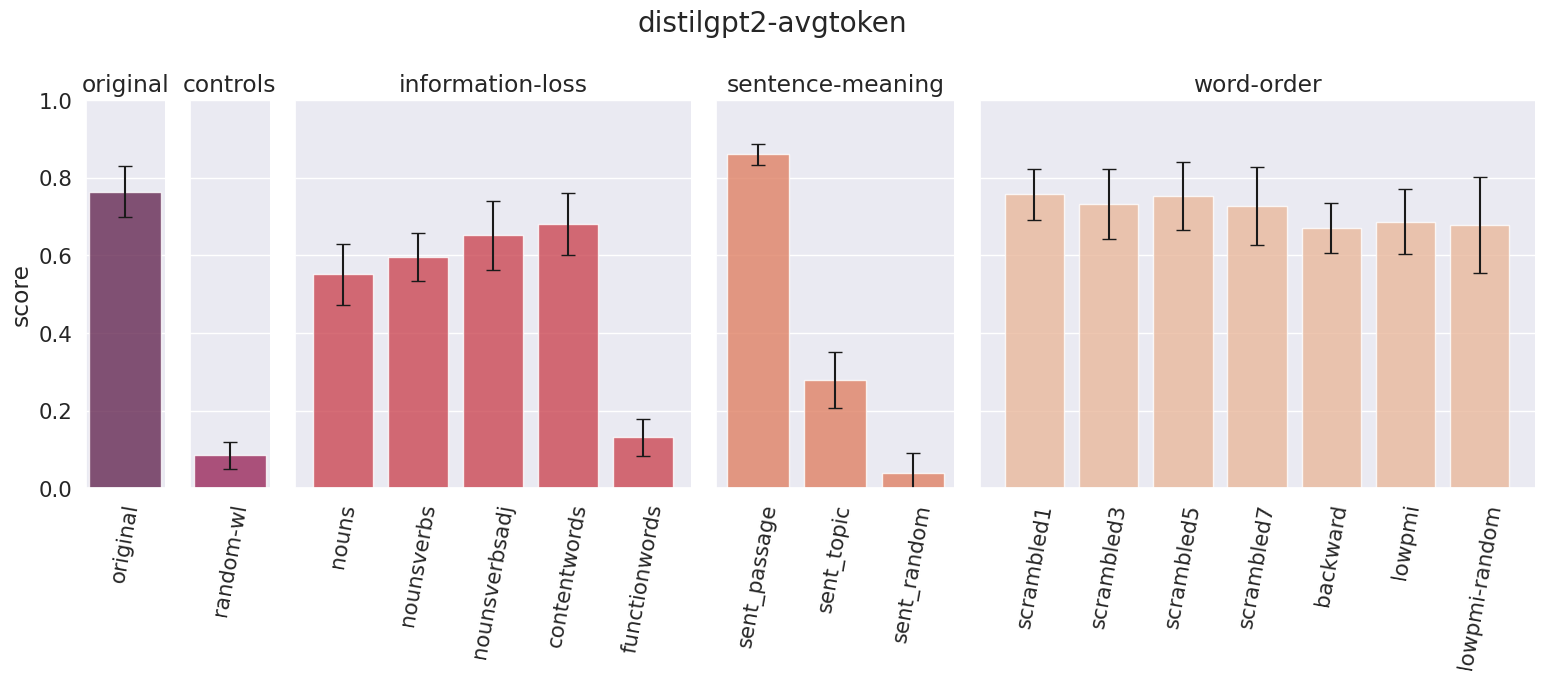

In [16]:
main("distilgpt2-avgtoken", testonperturbed=True)

# All models barplot

In [17]:
save=True

def barplot_multi(list_of_model_identifiers, scores_df, emb_context="Passage", split_coord="Sentence", testonperturbed=False):

    colors = sns.color_palette("rocket")[1:]
    sns.set(font_scale=1.4)

    #get proportions for subplot width
    categories = ["original", "controls", "information-loss", "sentence-meaning", "word-order"]
    props = [len(scores_df.loc[scores_df["category"] == cat])/len(scores_df) for cat in categories]

    g = sns.catplot(data=scores_df, x='condition', y='score', hue='model', col='category', kind='bar', sharex=False,
                    facet_kws={'gridspec_kws': {"width_ratios": props}}, height=7, aspect=.45, legend_out=True)
 
          
   # g.map(plt.errorbar, "condition", "score", "error", ls='none', color="k", capsize=5)
    g.set_titles(col_template="{col_name}")
    g.set_xlabels("")
    g.set_xticklabels(rotation=80)
    
    if not "gpt2-xl" in list_of_model_identifiers:
        g.set(ylim=(0, 1))
    else:
        g.set(ylim=(0, 1.25))
    
        title_addition = " | decontextualized"
        
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 0.75))
    g.fig.tight_layout()

    if save:
        g.savefig(f'images/match-to-brain_allgpts.png', bbox_inches='tight', dpi=240)

    plt.show()

In [18]:
import pandas as pd

def main_multi(list_of_model_identifiers, emb_context="Passage", split_coord="Sentence", testonperturbed=False):
    frames = []

    for model in list_of_model_identifiers:
        m_scores_df = pu.get_best_scores_df(model, emb_context=emb_context,
                                    split_coord=split_coord, testonperturbed=testonperturbed)
        m_scores_df["model"] = [model] * len(m_scores_df)
        frames.append(m_scores_df)
    
    scores_df = pd.concat(frames)

    if MAD_corrected:
        scores_df["error"] = scores_df["error"].div(1.4826) #MAD is wrong
    
    barplot_multi(list_of_model_identifiers, scores_df, emb_context=emb_context,
            split_coord=split_coord, testonperturbed=testonperturbed)
    
    return scores_df

In [19]:
plotting_models = ["distilgpt2", "gpt2", "gpt2-xl"]

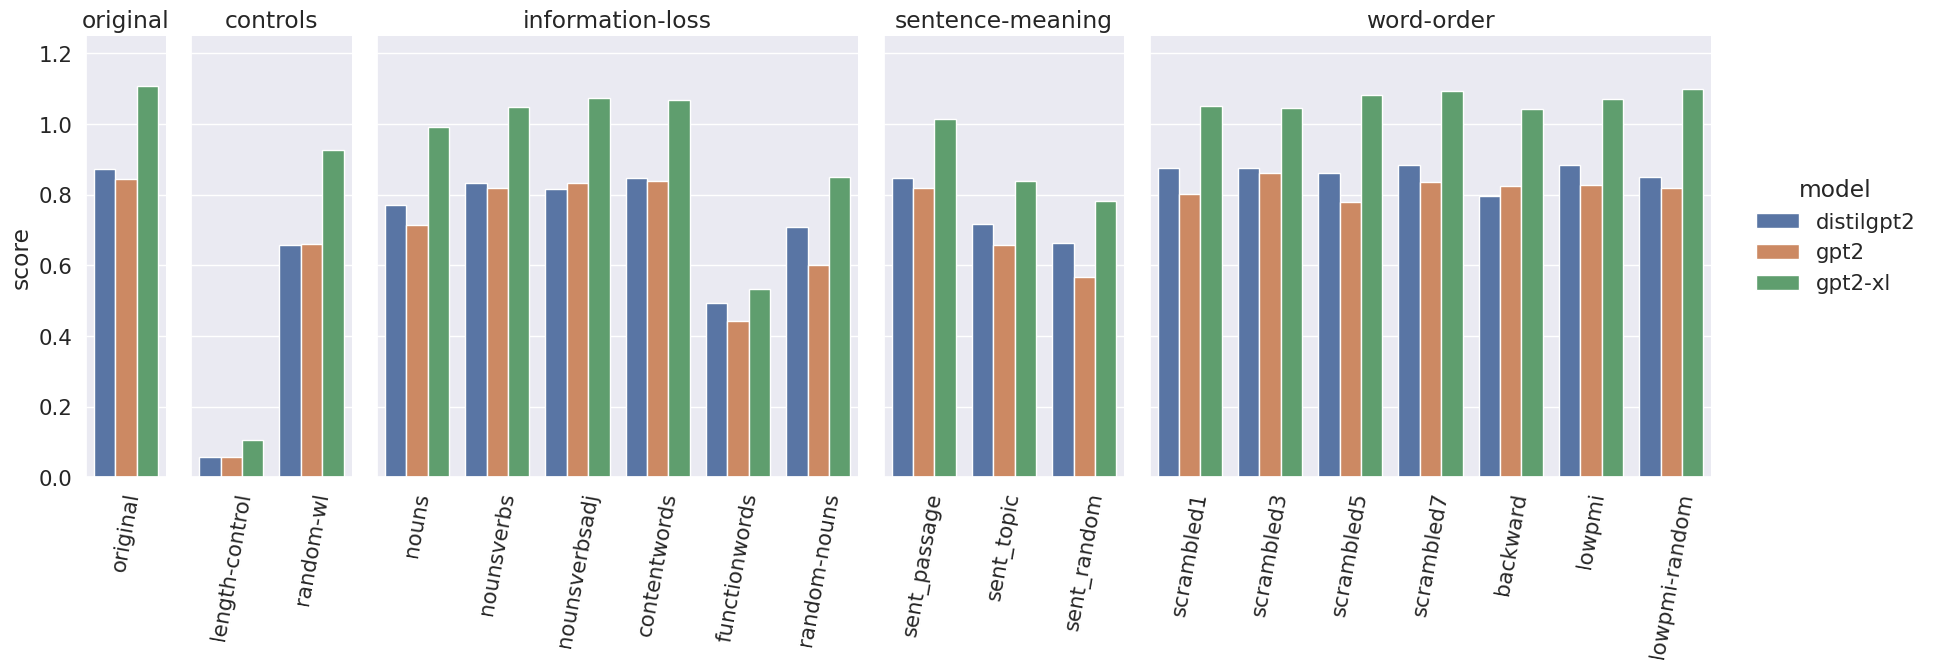

In [20]:
scores_df = main_multi(plotting_models)

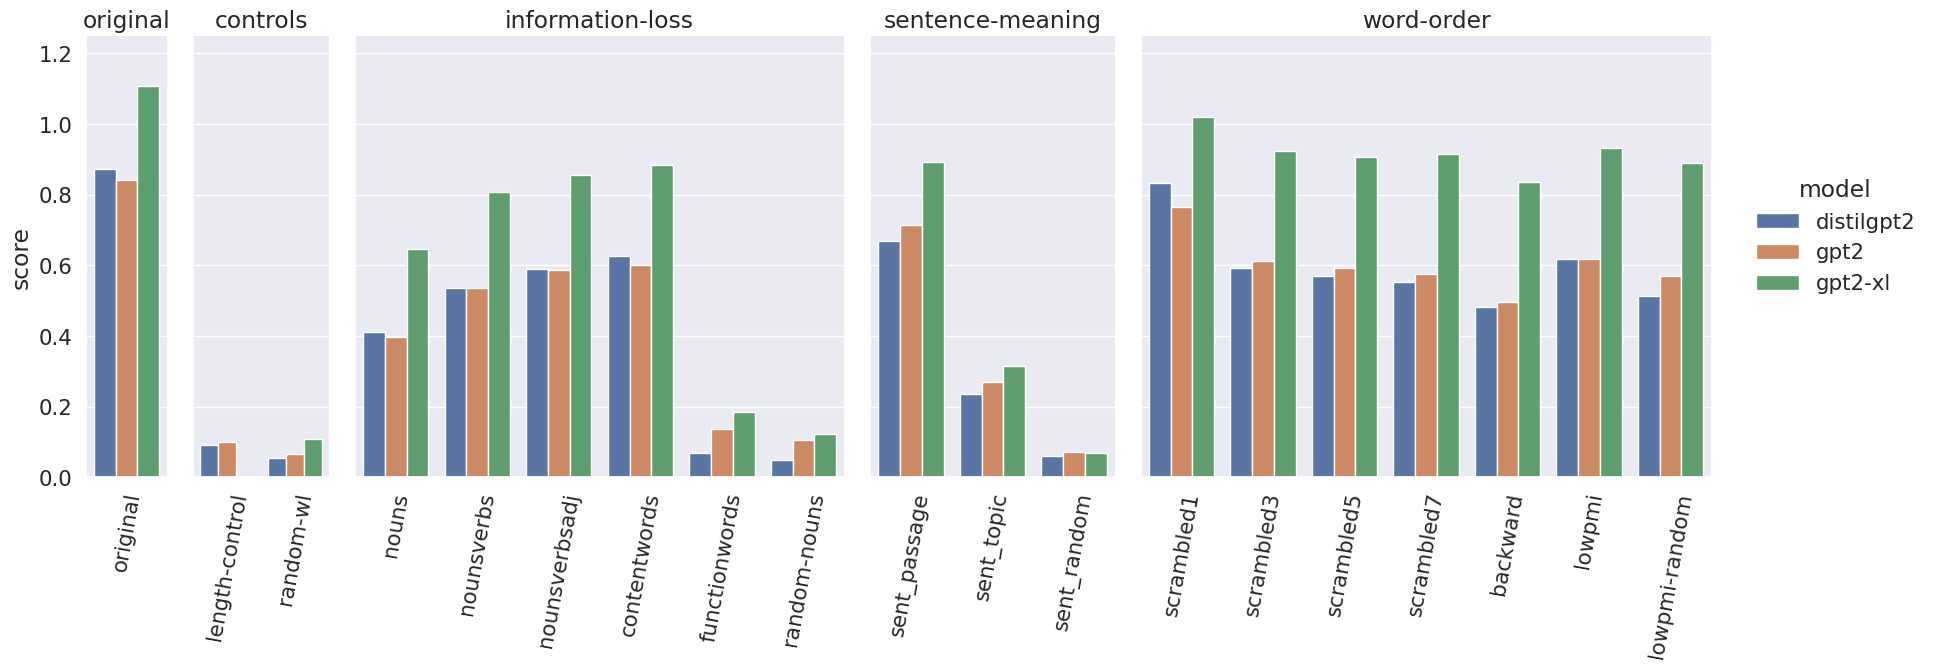

In [21]:
scores_df = main_multi(plotting_models, testonperturbed=True)

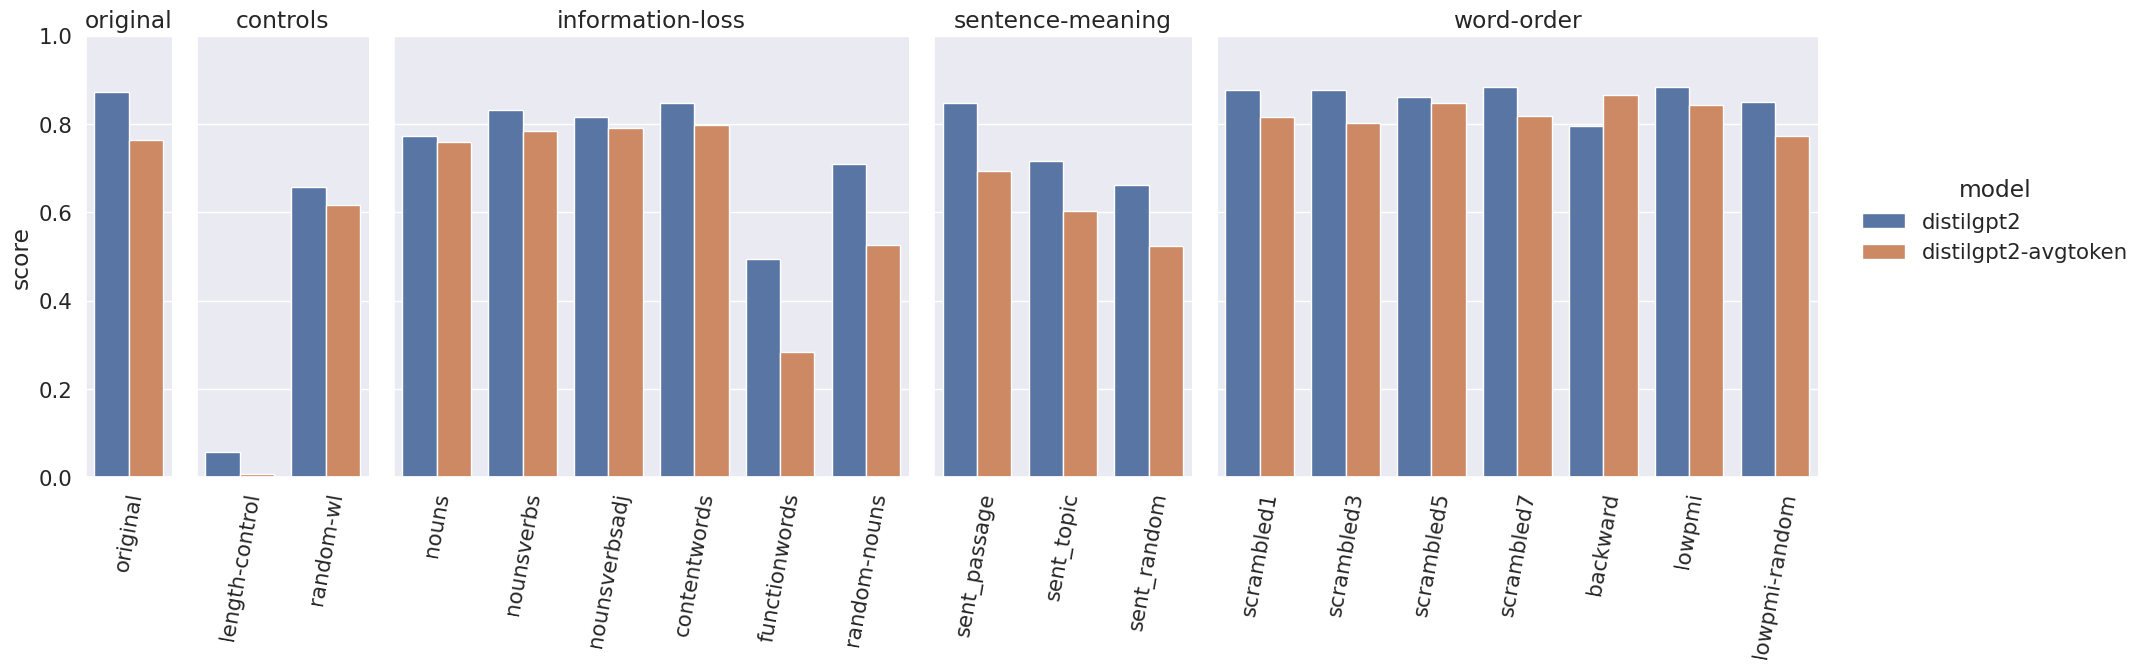

In [22]:
plotting_models = ["distilgpt2", "distilgpt2-avgtoken"]
scores_df = main_multi(plotting_models)

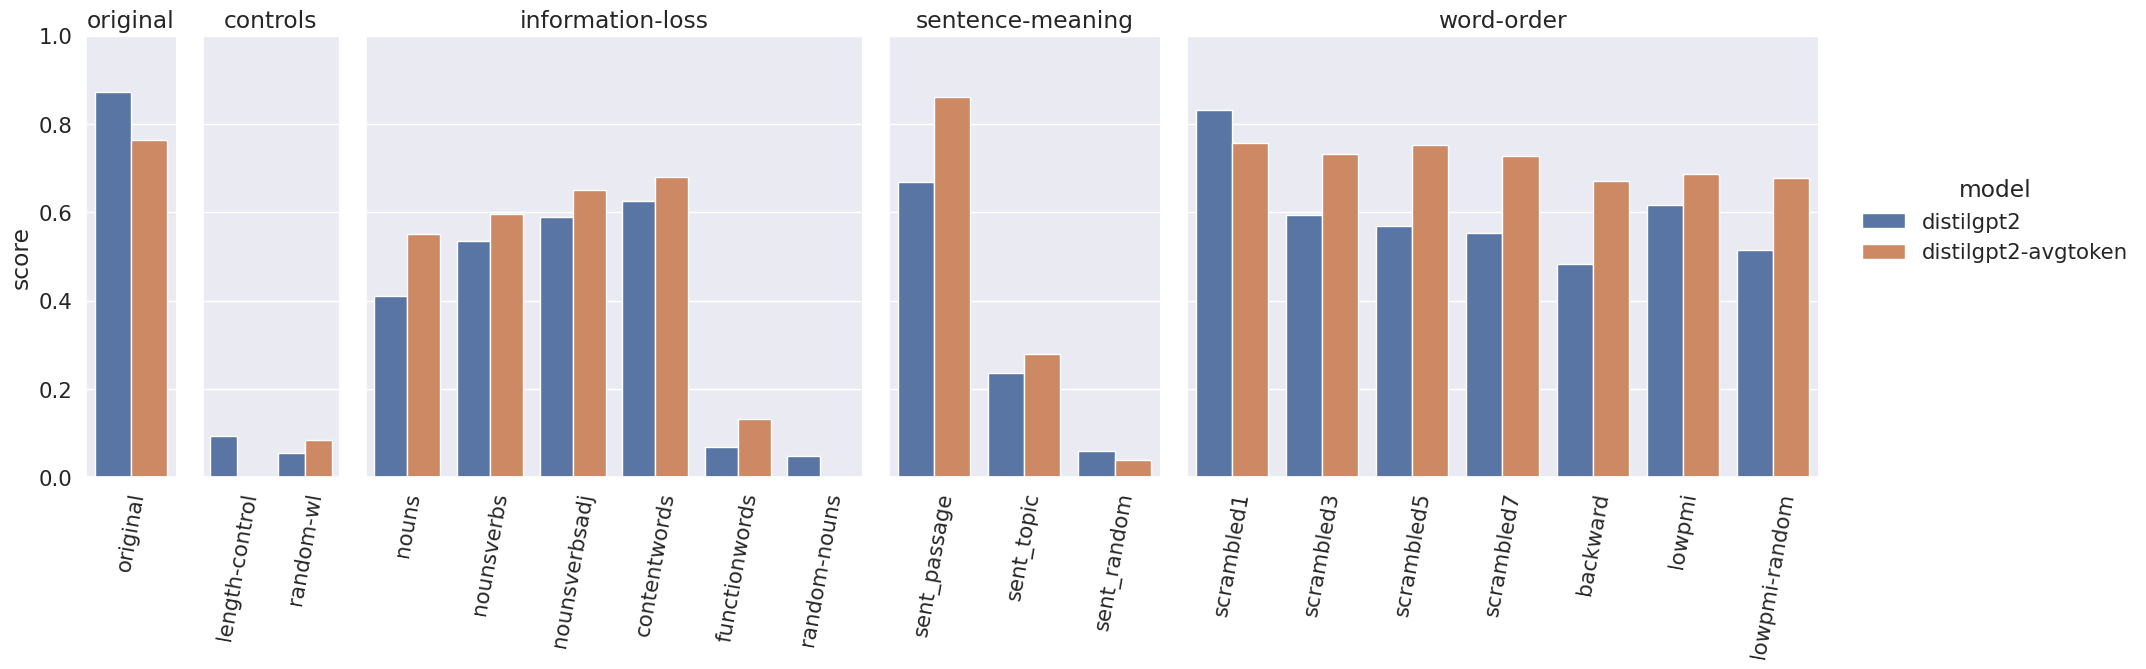

In [23]:
scores_df = main_multi(plotting_models, testonperturbed=True)

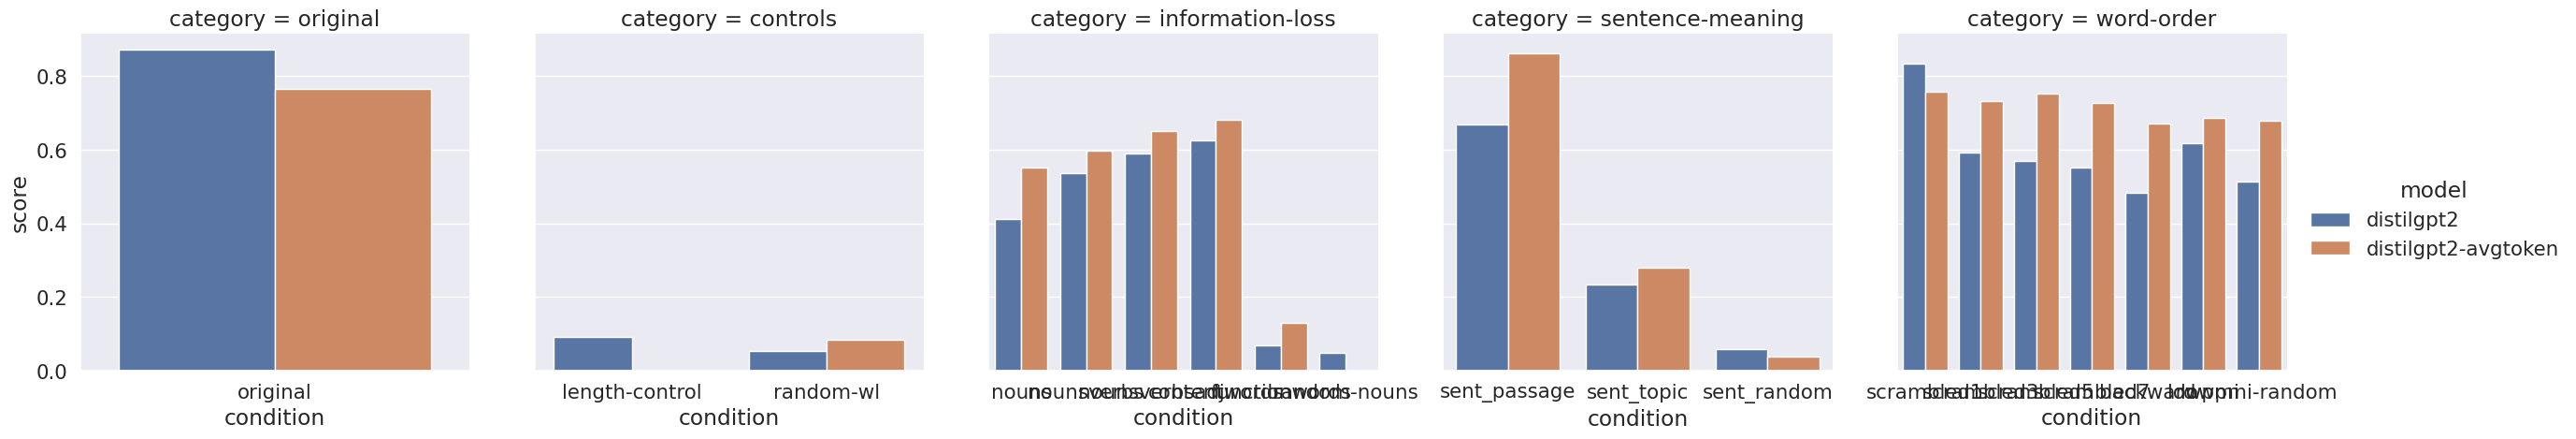

In [24]:
colors = sns.color_palette("rocket")[1:]
sns.catplot(data=scores_df, x='condition', y='score', hue='model', col='category', kind='bar', sharex=False)

# PLOTLY EXPRESS

In [25]:
# !pip install -U kaleido

In [26]:
save = False

In [27]:
def barplot_plotly(model_identifier, scores_df, emb_context="Passage", split_coord="Sentence", testonperturbed=False):
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    
    colors = sns.color_palette("rocket")[1:]

    #get proportions for subplot width
    categories = ["original", "control", "information_loss", "meaning", "word_order"]
    props = [len(scores_df.loc[scores_df["category"] == cat])/len(scores_df) for cat in categories]

    #make subplot
    fig = make_subplots(rows=1, cols=len(categories), column_widths=props, shared_yaxes=True, subplot_titles = categories)

    for ind, key in enumerate(categories):
        #subset df
        curr_df = scores_df.loc[scores_df["category"] == key]
        curr_color = colors[ind]
        #add figure trace
        fig.add_trace(
            go.Bar(name=key, x=list(curr_df["condition"]), y=list(curr_df["score"]),
#             marker_color=curr_color,
            error_y={
                "type": "data",
                "array": list(curr_df["error"])
            }
        ),row=1, col=ind+1)

        #uodate layout
    title = f"{model_identifier}"
    if not testonperturbed:
        title += f" | Trained and tested on perturbed"
    fig.update_layout(title_text=f"{model_identifier}",
                      showlegend=False) 
    fig.update_xaxes(tickangle=270)

    if save:
        if not os.path.exists("images"):
            os.mkdir("images")
        fig.write_image(f"images/{title}.png")

    fig.show()

In [28]:
# barplot("distilgpt2", scores_df)

In [29]:
def main_plotly(model_identifier, emb_context="Passage", split_coord="Sentence", testonperturbed=False):
    scores_df = pu.get_best_scores_df(model_identifier, emb_context=emb_context,
                                      split_coord=split_coord, testonperturbed=testonperturbed)
    barplot_plotly(model_identifier, scores_df, emb_context=emb_context,
            split_coord=split_coord, testonperturbed=testonperturbed)

In [30]:
main_plotly("gpt2")

In [31]:
main_plotly("gpt2", testonperturbed=True)